In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

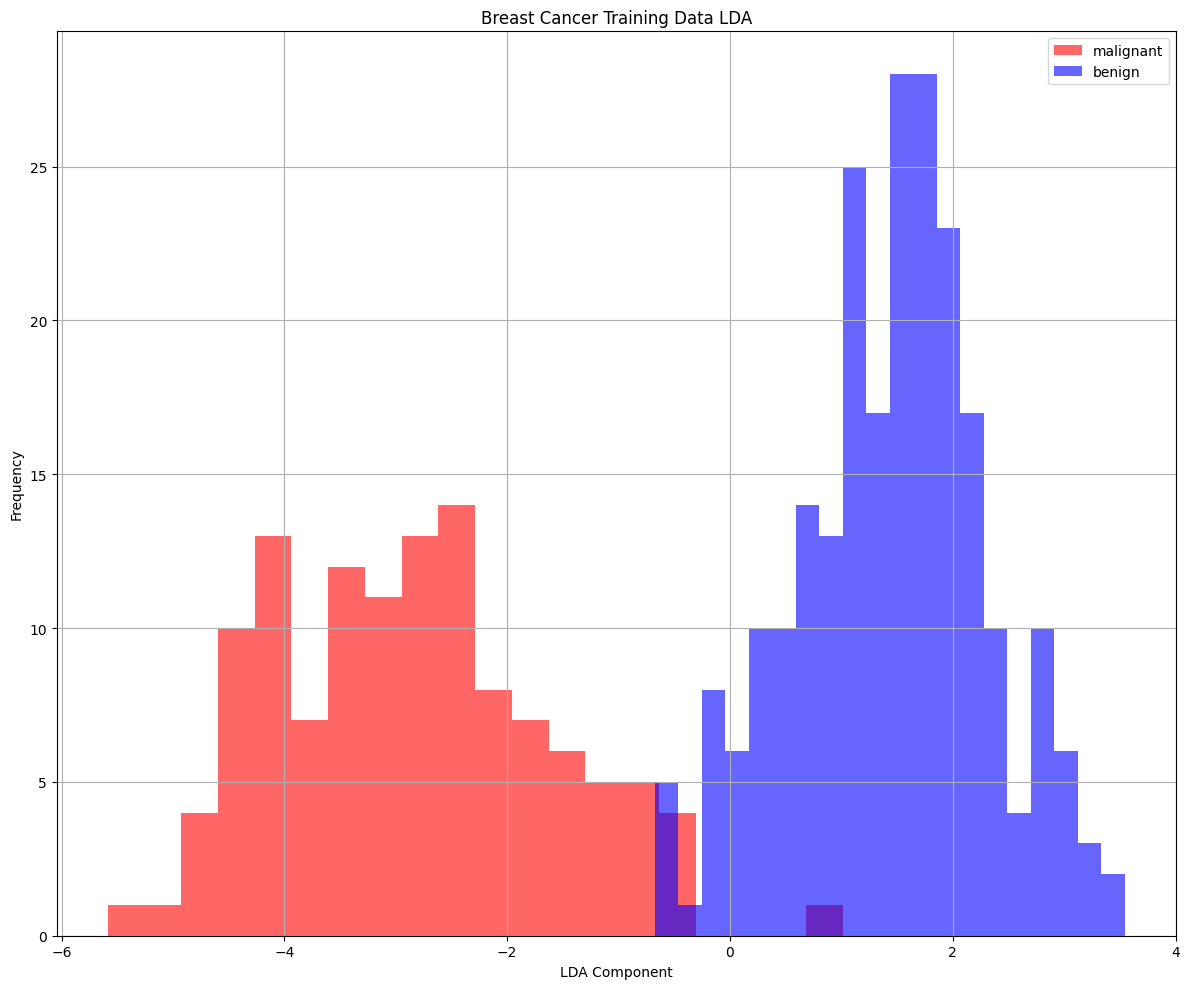

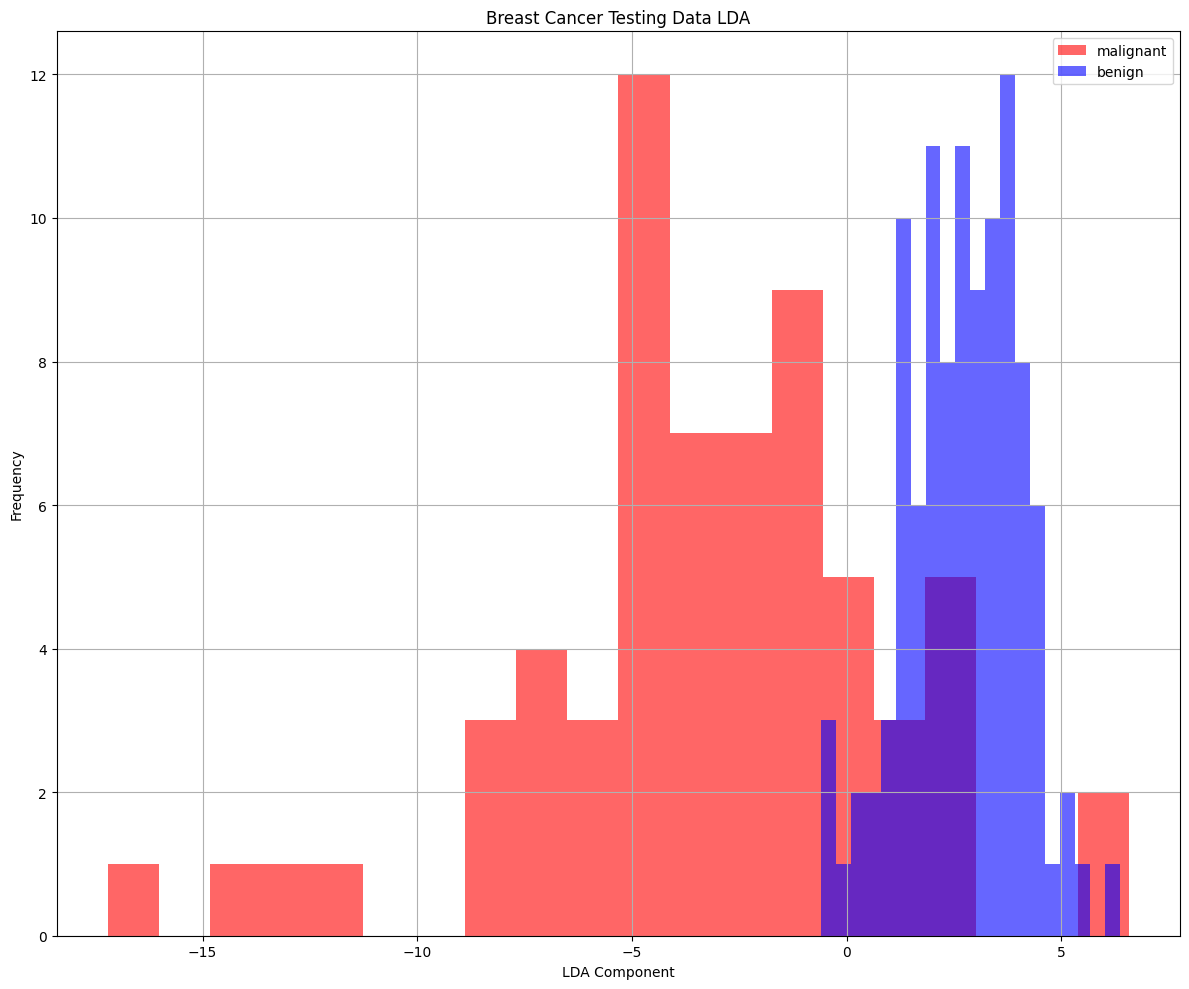

[I 2025-04-27 09:55:43,574] A new study created in memory with name: no-name-a21f3a33-f5ce-49ab-991a-1547e9ad31e1
[I 2025-04-27 09:55:47,291] Trial 0 finished with value: 0.9751141552511415 and parameters: {'penalty': 'l2', 'C': 94.4936116273535, 'solver': 'lbfgs', 'max_iter': 746}. Best is trial 0 with value: 0.9751141552511415.
[I 2025-04-27 09:55:48,206] Trial 1 finished with value: 0.9778919330289193 and parameters: {'penalty': 'l2', 'C': 96.66078288123286, 'solver': 'lbfgs', 'max_iter': 2965}. Best is trial 1 with value: 0.9778919330289193.
[I 2025-04-27 09:55:48,784] Trial 2 finished with value: 0.9806697108066971 and parameters: {'penalty': 'l2', 'C': 43.18705571112021, 'solver': 'lbfgs', 'max_iter': 444}. Best is trial 2 with value: 0.9806697108066971.
[I 2025-04-27 09:55:50,111] Trial 3 finished with value: 0.9779680365296803 and parameters: {'penalty': 'l2', 'C': 63.525496725755715, 'solver': 'lbfgs', 'max_iter': 3781}. Best is trial 2 with value: 0.9806697108066971.
/opt/hom

Best trial:
Accuracy: 0.9835235920852359
Best hyperparameters:  {'penalty': 'l2', 'C': 99.91965349716382, 'solver': 'liblinear', 'max_iter': 4823}


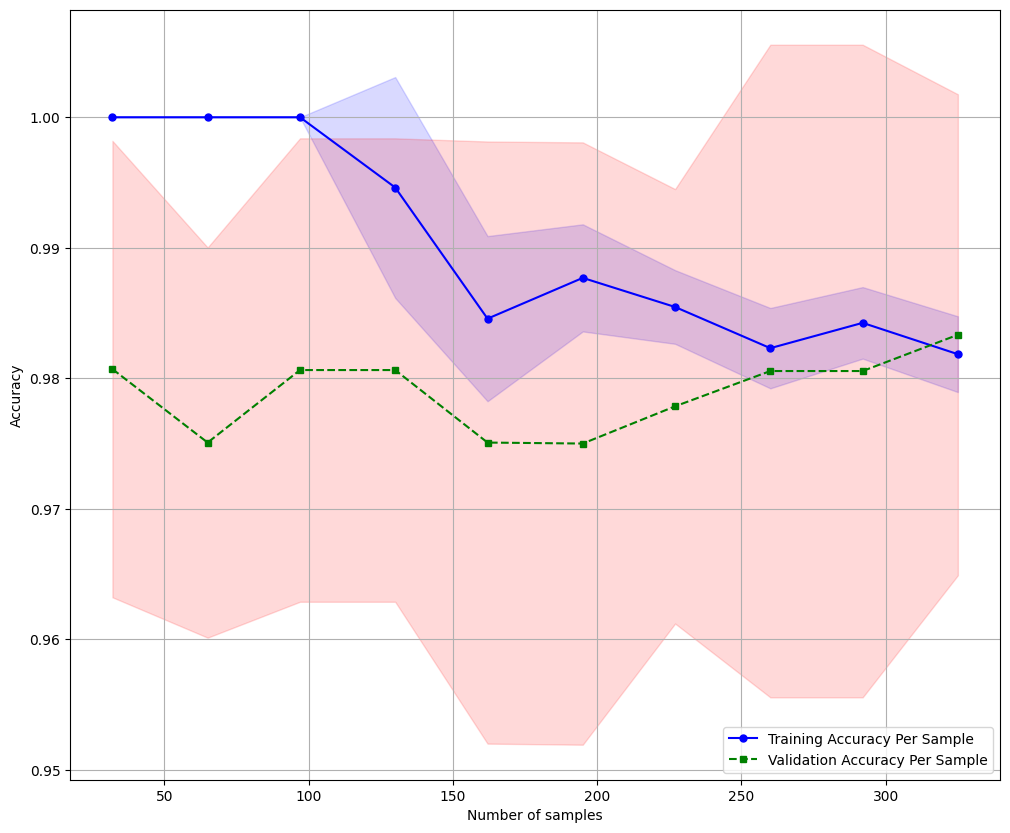

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 14.
  warnings.warn(


Confusion Matrix
[[ 49  15]
 [  1 106]]
Accuracy: 0.9064, Precision: 0.8760, Recall: 0.9907, F1: 0.9298, AUC: 0.9282


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lr', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)